In [79]:
import numpy as np
import pandas as pp
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [758]:
def ACF(data,lags):
    # convert input data into a numpy array
    data = np.array(data)
    # acf will store the autocorreltion coefficent at each lag interval
    # the first datapoint is always 1.0 since anything correlated with itsself is = 1
    acf = [1.0]
    # calculate the mean for the entire dataset
    y_bar = data.mean()
    print("The mean of this dataset is: ",y_bar)
    # subtract the mean from each observation
    yy_bar = data - y_bar
    # clacualte the total variance for the data set
    total_variance = sum(np.square(yy_bar))
    #print("The total variance for this dataset is: ", total_variance)
    # perform a forloop over the dataset with the desired number of lags
    # range is 1,lags b/c the first iteration calcualtes T1
    for i in range(1,lags):
        # first nparray is removing the last element each iteration
        yy_bar_bottom = yy_bar[:-i]
        # second nparray removes the first element each interation
        yy_bar_top = yy_bar[i:]
        # take the sum of of the product of each nparray each iteration
        yy = sum(yy_bar_top * yy_bar_bottom)
        # divide the sum by total variance and append to resulting acf list
        acf.append(yy/total_variance)
    return acf

In [759]:
def acf_plot(y):
    #y = y.tolist()
    y_rev = y[::-1]
    y_rev.extend(y[1:])
    print(len(y_rev))
    lb = -(math.floor(len(y_rev)/2))
    hb = -(lb-1)
    x = np.array(list(range(lb,hb)))
    figure = plt.stem(x,y_rev,use_line_collection=True)
    plt.xlabel('Lag', fontsize=15)
    plt.ylabel('AC Coefficent', fontsize=15)
    plt.title('ACF',fontsize=18)
    plt.show()

    #return y_rev

In [767]:
def GPAC(y):
    acf = ACF(y,30)
    acf_plot(ACF(y,15))
    # construct den matrix  
    den = np.zeros([14,7])
    for j in range(0,14):
        for k in range(1,8):
            den[j][k-1] = acf[abs(j-k+1)]
            
    # GPAC matrix    
    phikk = np.zeros([7,7])
    for j in range(0,7):
        for k in range(0,7):
            if k == 0:
                d = den[j][k]
                n = den[j+1][k]
                phi = n/d
                if d < 0.001:
                    phi = 0
                phikk[j][k] = phi
            else:
                d = den[j:j+k+1,:k+1]
                # capture the den info for num
                n1 = den[j:j+k+1,:k]
                # create j+k column
                n2 = np.array(acf[j+1:j+k+2])
                num = np.concatenate([n1,n2],axis =1)
                phi = (np.linalg.det(num))/(np.linalg.det(d))
                dt = (np.linalg.det(d))
                if dt < 0.001:
                    phi = 0
                phikk[j][k] = phi

    # Plot table
    sns.heatmap(phikk,annot=True,vmax=.1,vmin=-.1)
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.title("GPAC")
    plt.xticks(np.arange(0.5,len(phikk),1),np.arange(1,8,1))
    plt.show()

In [762]:
def ARMA_gen():
    a = int(input("\nEnter the numbers of samples :"))
    b = int(input("\nEnter the order # of the AR process :"))
    c = int(input("\nEnter the order # of the MA process :"))
    print("\n The program will ask you to enter each parameter indivdually")
    na = np.zeros(b)
    for i in range(len(na)):
        na[i]= (float(input("\nEnter paramter {0} of AR({1}):".format(i+1,b))))
    if b < c:
        x = np.zeros(c-b)
        na = np.array(list(na) + list(x))
    d = np.array([1] + list(na))
    
    nb = np.zeros(c)
    for  i in range(len(nb)):
        nb[i] = (float(input("\nEnter parameter {0} of MA({1}):".format(i+1,c))))
    if c < b:
        z = np.zeros(b-c)
        nb = np.array(list(nb) + list(z))
    e = np.array([1] + list(nb))
    
    results = ARMA(a,b,c,d,e)
    
    GPAC(results)
    
    return results


Enter the numbers of samples :1000000

Enter the order # of the AR process :1

Enter the order # of the MA process :0

 The program will ask you to enter each parameter indivdually

Enter paramter 1 of AR(1):-.5

ARMA with AR order 1 and MA order 0
MA [1. 0.]
AR [ 1.  -0.5]


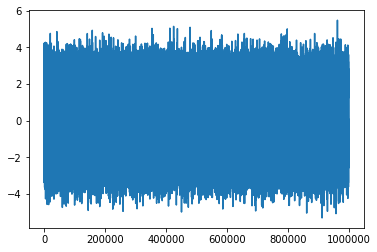

The mean of this dataset is:  -0.003200771045574585
The mean of this dataset is:  -0.003200771045574585
29


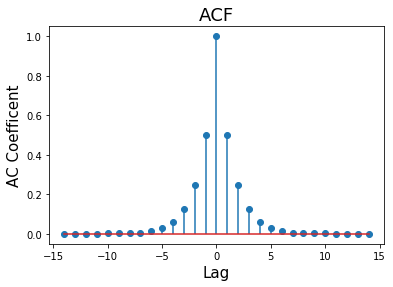

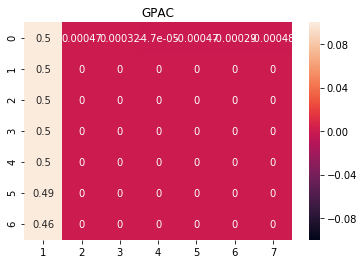

In [774]:
y = ARMA_gen()

In [769]:
acf = ACF(y,30)

The mean of this dataset is:  0.03806098233291448


In [770]:
acf[:4]

[1.0, array([0.49359435]), array([0.2455402]), array([0.12036413])]

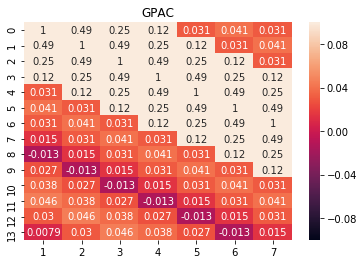

In [771]:
# construct den matrix  
den = np.zeros([14,7])
for j in range(0,14):
    for k in range(1,8):
        den[j][k-1] = acf[abs(j-k+1)]
sns.heatmap(den,annot=True,vmax=.1,vmin=-.1)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("GPAC")
plt.xticks(np.arange(0.5,len(phikk),1),np.arange(1,8,1))
plt.show()

In [772]:
phikk1 = np.zeros([7,7])
for j in range(0,7):
    for k in range(0,7):
        if k == 0:
            d = den[j][k]
            n = den[j+1][k]
            phi = n/d
            if d < 0.01:
                phi = 0
            phikk1[j][k] = phi
        else:
            d = den[j:j+k+1,:k+1]
            # capture the den info for num
            n1 = den[j:j+k+1,:k]
            # create j+k column
            n2 = np.array(acf[j+1:j+k+2])
            num = np.concatenate([n1,n2],axis =1)
            phi = (np.linalg.det(num))/(np.linalg.det(d))
            dt = (np.linalg.det(d))
            if dt < 0.001:
                phi = 0
            phikk1[j][k] = phi

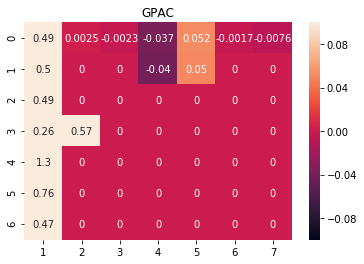

In [773]:
sns.heatmap(phikk1,annot=True,vmax=.1,vmin=-.1)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("GPAC")
plt.xticks(np.arange(0.5,len(phikk),1),np.arange(1,8,1))
plt.show()